<a href="https://colab.research.google.com/github/KhudV/graduation_paper_code/blob/main/%D0%92%D0%9A%D0%A0_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(88)

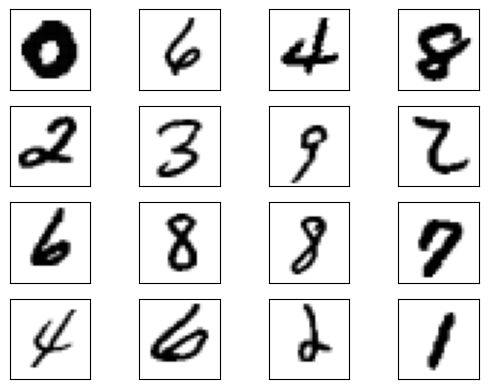

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_train = (x_train - 0.5) / 0.5
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(batch_size)
real_samples = next(iter(train_dataset))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(real_samples[i], cmap="gray_r")
  plt.xticks([])
  plt.yticks([])

In [ ]:
discriminator = keras.Sequential([layers.Input(shape=(28, 28)),
                                  layers.Flatten(),
                                  layers.Dense(1024),
                                  layers.ReLU(),
                                  layers.Dropout(0.3),
                                  layers.Dense(512),
                                  layers.ReLU(),
                                  layers.Dropout(0.3),
                                  layers.Dense(256),
                                  layers.ReLU(),
                                  layers.Dropout(0.3),
                                  layers.Dense(1),
                                  layers.Activation("sigmoid"),])
generator = keras.Sequential([layers.Input(shape=(100,)),
                              layers.Dense(256),
                              layers.ReLU(),
                              layers.Dense(512),
                              layers.ReLU(),
                              layers.Dense(1024),
                              layers.ReLU(),
                              layers.Dense(784),
                              layers.Activation("tanh"),
                              layers.Reshape((28, 28)),])
lr = 0.0001
num_epochs = 50
loss_function = keras.losses.BinaryCrossentropy()
optimizer_discriminator = keras.optimizers.Adam(learning_rate=lr)
optimizer_generator = keras.optimizers.Adam(learning_rate=lr)

In [ ]:
# Create a function for training
@tf.function
def train_step(real_samples, real_samples_labels, generator, discriminator, optimizer_generator, optimizer_discriminator, loss_function, batch_size):
    with tf.GradientTape() as tape_discriminator, tf.GradientTape() as tape_generator:
        latent_space_samples = tf.random.normal((batch_size, 100))
        generated_samples = generator(latent_space_samples)

        output_discriminator_real = discriminator(real_samples)
        output_discriminator_generated = discriminator(generated_samples)

        loss_discriminator_real = loss_function(real_samples_labels, output_discriminator_real)
        loss_discriminator_generated = loss_function(tf.zeros((batch_size, 1)), output_discriminator_generated)
        loss_discriminator = loss_discriminator_real + loss_discriminator_generated

        loss_generator = loss_function(real_samples_labels, output_discriminator_generated)

    gradients_discriminator = tape_discriminator.gradient(loss_discriminator, discriminator.trainable_weights)
    optimizer_discriminator.apply_gradients(zip(gradients_discriminator, discriminator.trainable_weights))

    gradients_generator = tape_generator.gradient(loss_generator, generator.trainable_weights)
    optimizer_generator.apply_gradients(zip(gradients_generator, generator.trainable_weights))

    return loss_discriminator, loss_generator

Epoch: 0 Loss D.: 0.2312530279159546
Epoch: 0 Loss G.: 1.6800849437713623


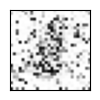

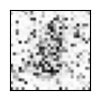

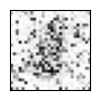

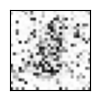

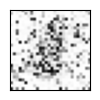

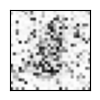

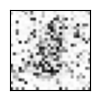

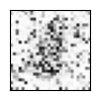

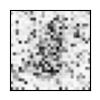

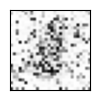

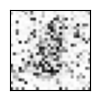

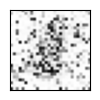

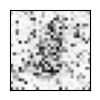

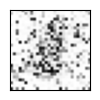

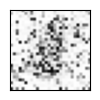

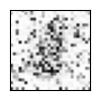

Epoch: 1 Loss D.: 0.28056225180625916
Epoch: 1 Loss G.: 7.420681953430176
Epoch: 2 Loss D.: 0.11879676580429077
Epoch: 2 Loss G.: 2.524083137512207
Epoch: 3 Loss D.: 0.0076242717914283276
Epoch: 3 Loss G.: 7.313484191894531
Epoch: 4 Loss D.: 0.10129774361848831
Epoch: 4 Loss G.: 2.709383010864258
Epoch: 5 Loss D.: 0.11659430712461472
Epoch: 5 Loss G.: 2.7484145164489746
Epoch: 6 Loss D.: 0.09758172184228897
Epoch: 6 Loss G.: 3.4680588245391846
Epoch: 7 Loss D.: 0.0035371913108974695
Epoch: 7 Loss G.: 5.943457126617432
Epoch: 8 Loss D.: 0.012511096894741058
Epoch: 8 Loss G.: 5.120041847229004
Epoch: 9 Loss D.: 0.2104843705892563
Epoch: 9 Loss G.: 8.70382308959961
Epoch: 10 Loss D.: 0.015467209741473198
Epoch: 10 Loss G.: 4.23835563659668


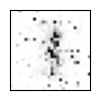

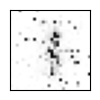

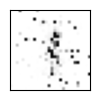

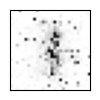

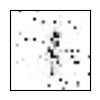

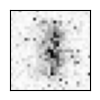

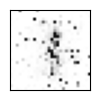

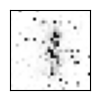

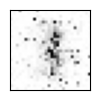

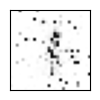

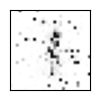

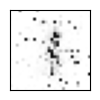

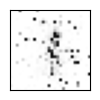

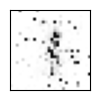

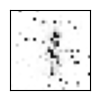

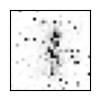

Epoch: 11 Loss D.: 0.38775336742401123
Epoch: 11 Loss G.: 2.1843180656433105
Epoch: 12 Loss D.: 1.7524525901535526e-05
Epoch: 12 Loss G.: 14.110857009887695
Epoch: 13 Loss D.: 0.0010844608768820763
Epoch: 13 Loss G.: 7.3329548835754395
Epoch: 14 Loss D.: 0.0017037845682352781
Epoch: 14 Loss G.: 8.37200927734375
Epoch: 15 Loss D.: 0.1283494234085083
Epoch: 15 Loss G.: 4.791314601898193
Epoch: 16 Loss D.: 0.09159062802791595
Epoch: 16 Loss G.: 6.459541320800781
Epoch: 17 Loss D.: 0.03943273425102234
Epoch: 17 Loss G.: 4.581727981567383
Epoch: 18 Loss D.: 0.09900062531232834
Epoch: 18 Loss G.: 5.53386926651001
Epoch: 19 Loss D.: 0.07999785989522934
Epoch: 19 Loss G.: 4.8210248947143555
Epoch: 20 Loss D.: 0.3462408781051636
Epoch: 20 Loss G.: 2.0017833709716797


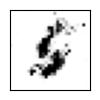

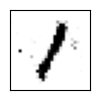

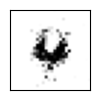

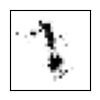

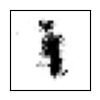

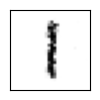

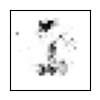

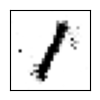

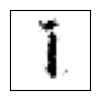

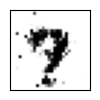

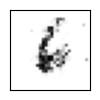

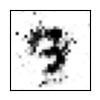

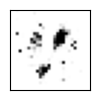

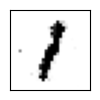

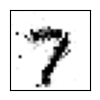

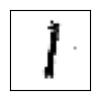

Epoch: 21 Loss D.: 0.35000818967819214
Epoch: 21 Loss G.: 3.4808759689331055
Epoch: 22 Loss D.: 0.37428420782089233
Epoch: 22 Loss G.: 2.8890883922576904
Epoch: 23 Loss D.: 0.43814581632614136
Epoch: 23 Loss G.: 3.863405227661133
Epoch: 24 Loss D.: 0.2679445147514343
Epoch: 24 Loss G.: 2.962780237197876
Epoch: 25 Loss D.: 1.0774294137954712
Epoch: 25 Loss G.: 3.4691641330718994
Epoch: 26 Loss D.: 0.3914629817008972
Epoch: 26 Loss G.: 2.1812846660614014
Epoch: 27 Loss D.: 0.33487313985824585
Epoch: 27 Loss G.: 2.3024611473083496
Epoch: 28 Loss D.: 0.4354235529899597
Epoch: 28 Loss G.: 2.144322395324707
Epoch: 29 Loss D.: 0.856590747833252
Epoch: 29 Loss G.: 2.224705219268799
Epoch: 30 Loss D.: 0.4429819583892822
Epoch: 30 Loss G.: 2.092707633972168


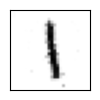

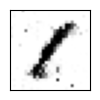

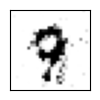

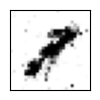

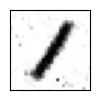

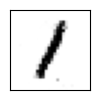

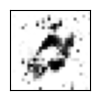

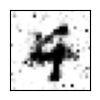

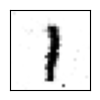

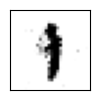

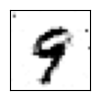

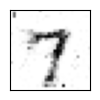

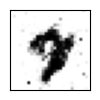

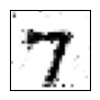

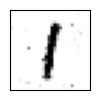

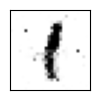

Epoch: 31 Loss D.: 0.833765983581543
Epoch: 31 Loss G.: 1.3541853427886963
Epoch: 32 Loss D.: 0.6889240741729736
Epoch: 32 Loss G.: 2.2030482292175293
Epoch: 33 Loss D.: 0.5496917963027954
Epoch: 33 Loss G.: 2.7948620319366455
Epoch: 34 Loss D.: 0.630441427230835
Epoch: 34 Loss G.: 2.070274829864502
Epoch: 35 Loss D.: 0.3056996166706085
Epoch: 35 Loss G.: 2.2585816383361816
Epoch: 36 Loss D.: 0.8711473941802979
Epoch: 36 Loss G.: 1.7083969116210938
Epoch: 37 Loss D.: 0.535469114780426
Epoch: 37 Loss G.: 1.8846371173858643
Epoch: 38 Loss D.: 0.5982593297958374
Epoch: 38 Loss G.: 1.933440923690796
Epoch: 39 Loss D.: 0.6985884308815002
Epoch: 39 Loss G.: 2.0253171920776367
Epoch: 40 Loss D.: 0.5880407094955444
Epoch: 40 Loss G.: 1.7812387943267822


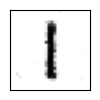

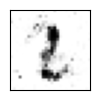

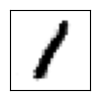

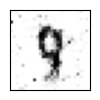

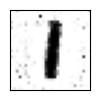

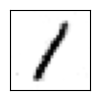

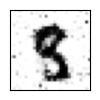

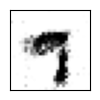

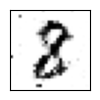

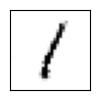

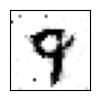

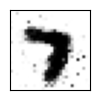

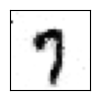

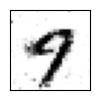

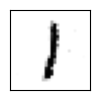

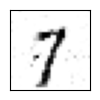

Epoch: 41 Loss D.: 0.7333105802536011
Epoch: 41 Loss G.: 2.114905834197998
Epoch: 42 Loss D.: 0.7929044961929321
Epoch: 42 Loss G.: 1.6744590997695923
Epoch: 43 Loss D.: 0.6431854367256165
Epoch: 43 Loss G.: 2.0128321647644043
Epoch: 44 Loss D.: 0.5770240426063538
Epoch: 44 Loss G.: 2.061494827270508
Epoch: 45 Loss D.: 0.5377272367477417
Epoch: 45 Loss G.: 1.9882303476333618
Epoch: 46 Loss D.: 0.601593017578125
Epoch: 46 Loss G.: 2.037555694580078
Epoch: 47 Loss D.: 0.7377416491508484
Epoch: 47 Loss G.: 1.7104872465133667
Epoch: 48 Loss D.: 0.7858128547668457
Epoch: 48 Loss G.: 1.5747137069702148
Epoch: 49 Loss D.: 0.5491681098937988
Epoch: 49 Loss G.: 1.7387096881866455
CPU times: user 2h 36min 48s, sys: 5min 47s, total: 2h 42min 35s
Wall time: 1h 35min 13s


In [ ]:
%%time
for epoch in range(num_epochs):
    for n, real_samples in enumerate(train_dataset):
        real_samples_labels = tf.ones((batch_size, 1))

        loss_discriminator, loss_generator = train_step(real_samples, real_samples_labels, generator, discriminator, optimizer_generator, optimizer_discriminator, loss_function, batch_size)

        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

    if epoch % 10 == 0:
        generated_samples = generator(tf.random.normal((16, 100)))
        generated_samples = generated_samples.numpy()
        for i in range(16):
          ax = plt.subplot(4, 4, i + 1)
          plt.imshow(generated_samples[i], cmap="gray_r")
          plt.xticks([])
          plt.yticks([])
          plt.show()

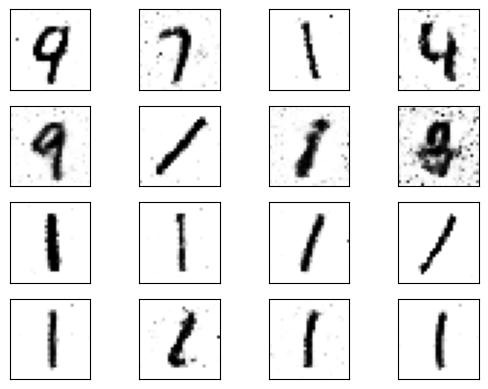

In [ ]:
latent_space_samples = tf.random.normal((batch_size, 100)) 
generated_samples = generator(latent_space_samples) 
generated_samples = generated_samples.numpy()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [ ]:
discriminator.save("/content/drive/MyDrive/ВКР/discriminator_keras.h5")
generator.save("/content/drive/MyDrive/ВКР/generator_keras.h5")

In [ ]:
#Later to restore: 
discriminator = keras.models.load_model("/content/drive/MyDrive/ВКР/discriminator_keras.h5")
generator = keras.models.load_model("/content/drive/MyDrive/ВКР/generator_keras.h5")